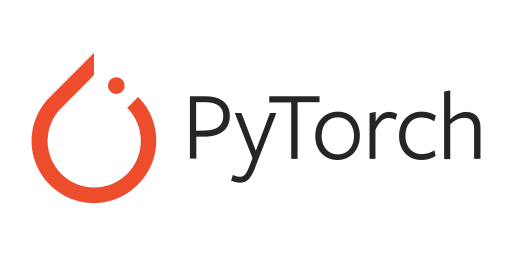

# What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


In [1]:
import numpy as np
import torch

## Modules in PyTorch

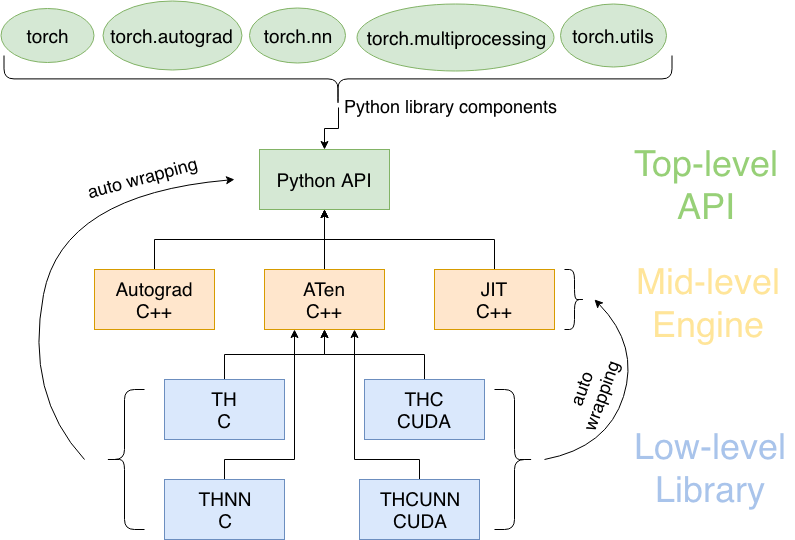

Reference: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/

In Google Colab, you can use Nvidia GPUs and TPUs for free! Check what kind of device is available:

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA RTX 4000 Ada Generation Laptop GPU', major=8, minor=9, total_memory=12281MB, multi_processor_count=58)

# PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

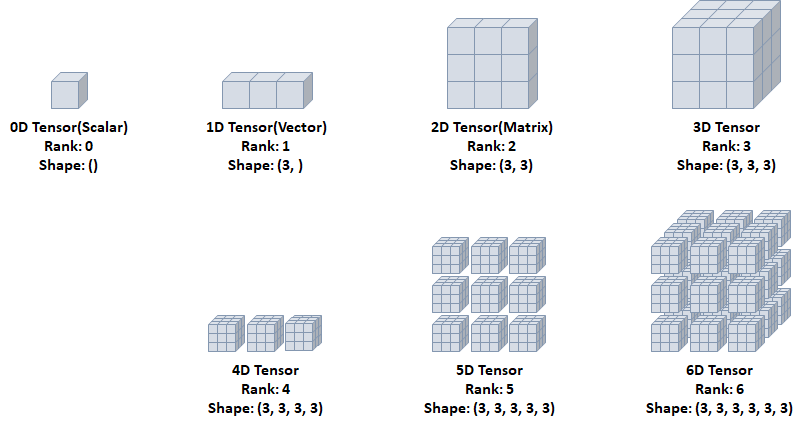

Reference: https://www.youtube.com/watch?v=k60oT_8lyFw&t=2114s (파이토치 한번에 끝내기 PyTorch Full Tutorial Course)

## Creating Tensors



Construct a randomly initialized matrix (uniform [0, 1]):



In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2467, 0.7102, 0.4916],
        [0.9656, 0.8164, 0.2067],
        [0.7463, 0.8513, 0.8729],
        [0.1874, 0.0920, 0.5660],
        [0.6648, 0.8229, 0.0687]])


Construct a matrix filled with zeros or ones:

In [5]:
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [6]:
x = torch.ones([5, 3])
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


Construct a tensor directly from data:



In [7]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [8]:
x = torch.tensor([[5.5, 3], [4, 6]])
print(x)

tensor([[5.5000, 3.0000],
        [4.0000, 6.0000]])


In [9]:
# from a numpy array
np_array = np.array([[5.5, 3], [4, 6]])
print(np_array)
x = torch.tensor(np_array)
print(x)

[[5.5 3. ]
 [4.  6. ]]
tensor([[5.5000, 3.0000],
        [4.0000, 6.0000]], dtype=torch.float64)


## Tensor Attributes
Here are three frequently used tensor attributes:
- Shape
- Datatype
- Device

### Shape
To know the shape of a given tensor, you can use the `.size()` method or `.shape` like numpy.

In [10]:
x = torch.zeros(2, 3, 4)
print(x)
print(x.size())
print(x.shape)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
torch.Size([2, 3, 4])
torch.Size([2, 3, 4])


Since `torch.Size` object is a kind of tuple, you can use tuple operations. E.g.,

In [11]:
x.shape[1:] + x.shape[:2]

torch.Size([3, 4, 2, 3])

Note: scalar is of shape `[]`.

In [12]:
torch.tensor(3).shape

torch.Size([])

In [13]:
torch.zeros([])

tensor(0.)

### Datatype
Use `.dtype` to see the datatype of a tensor. By default, it is `torch.float32`.

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [14]:
x.dtype

torch.float32

### Device
Use `.device` to see which device the tensor is on. Most commonly used device is `cpu` and `cuda` (it's not `gpu`!). If there are multiple GPUs, you can also specify the device number, e.g., `cuda:2`. The default is `cpu`.

In [15]:
x.device

device(type='cpu')

### Specifying the Attributes
You can additionaly specify the attributes while creating a tensor. For instance, to create a long integer tensor on GPU,

In [16]:
x = torch.zeros(5, 3, dtype=torch.double, device='cuda')
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0', dtype=torch.float64)


## Tensor Operations
There are 100+ tensor operations. Here we introduce most commonly used operations.

Refer to the documentation for the full description: https://pytorch.org/docs/stable/index.html

### Indexing and Slicing
You can use standard NumPy-like indexing and slicing.

In [17]:
x = torch.rand(5, 3)
print(x)
print(x[2, 1])
print(x[2, :])
print(x[2, :2])

tensor([[0.0279, 0.5343, 0.6828],
        [0.4320, 0.8596, 0.8490],
        [0.6025, 0.0438, 0.0539],
        [0.8387, 0.2108, 0.4673],
        [0.6301, 0.6216, 0.4639]])
tensor(0.0438)
tensor([0.6025, 0.0438, 0.0539])
tensor([0.6025, 0.0438])


### Reshaping

To reshape tensors (e.g., flatten a 3D tensor to a 1D array), you can use the `.view(new_shape)` or `.reshape(new_shape)`.

> Note: `.view` simply provide a new "view" of a tensor (does not allocate new memory), while `.reshape` may allocate new memory if necessary.

> WARNING: When reshaping, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [18]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = torch.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.shape)

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.reshape(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.shape)

# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Viewed tensor:", zeros_2d_matrix.shape)

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Viewed tensor: torch.Size([3, 4])


In [19]:
zeros_3d_tensor

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [20]:
zeros_1d_array

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Type Conversion

`Tensor.type()` returns the type if dtype is not provided, else casts this object to the specified type.

In [21]:
x = torch.ones(3, 2)
print(x)
print(x.type())
print(x.type(torch.long))
print(x.long())

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
torch.FloatTensor
tensor([[1, 1],
        [1, 1],
        [1, 1]])
tensor([[1, 1],
        [1, 1],
        [1, 1]])


In [22]:
x.dtype

torch.float32

### Copying to Other Devices

Use `Tensor.to()` to send a tensor to a specified device.

In [23]:
x = torch.ones(3, 2)
print(x)
print(x.to('cuda'))
print(x.to('cpu'))
print(x) # nothing happens to x itself

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### Arithmetic Operations

Tensor supports all basic arithmetic operations, including `+`, `-`, `*`, `/`, `**`, ...

In [24]:
ones = torch.ones(3, 2)
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

When two tensors are with the same shape, the operation is performed element-wise.

In [25]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])
print(t1 + t2)

tensor([5, 7, 9])


Note: There are other ways to add tensors as follows. These are all equivalent.

In [26]:
print(t1 + t2)
print(torch.add(t1, t2))
print(t1.add(t2))

tensor([5, 7, 9])
tensor([5, 7, 9])
tensor([5, 7, 9])


You can also do `exp` or `log` operations.

In [27]:
t = torch.tensor([1., 2., 3.])
print(t.exp())
print(t.log())

tensor([ 2.7183,  7.3891, 20.0855])
tensor([0.0000, 0.6931, 1.0986])


### Exercise: Tensor slicing, type conversion, and arithmetic operations

Given two tensors ```t1``` and ```t2``` both with shape (10, 10),

1. convert their type to double (64-bit floating point)
2. move both tensors to ```cuda```
3. perform addition between first two columns and rows of ```t1``` and last two columns and rows of ```t2```

In [28]:
torch.manual_seed(0)
t1 = torch.rand(10, 10)
t2 = torch.rand(10, 10)

# TODO
t1 = t1.double() ; t2 = t2.double()
t1.to('cuda') ; t2.to('cuda')
t1[:2,:2] + t2[-2:,-2:]

tensor([[0.5842, 1.5391],
        [0.5509, 0.8908]], dtype=torch.float64)

#### Broadcasting
Even when the shapes are different, there are some cases the operation is "broadcastable." Specifically, two tensors are “broadcastable” if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

For example, we can perform addition of a [3, 2]-shape matrix and a [2]-shape vector:

In [29]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([1, 2])

tensor([[2, 4],
        [4, 6],
        [6, 8]])

which is equivalent to

In [30]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([[1, 2], [1, 2], [1, 2]])

tensor([[2, 4],
        [4, 6],
        [6, 8]])

What if you want to add 1, 2, and 3 to each row?
```
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([1, 2, 3])
```
This code causes error. The correct answer is to use a [3, 1]-shape matrix:

In [31]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) \
  + torch.tensor([[1], [2], [3]])

tensor([[2, 3],
        [5, 6],
        [8, 9]])

In [32]:
# Understanding broadcasting rule
# 1. add 1 to the left most of the smaller tensor shape
# 2. check compatibility
# 3. if compatible, expand 1 if necessary
# e.g., t1.shape == (4, 2, 5, 2, 5), t2.shape == (2, 5)
# by rule 1, t2.shape -> (1, 1, 1, 2, 5)
# by rule 2, (4, 2, 5, 2, 5) and (1, 1, 1, 2, 5) are compatible
# by rule 3, (1, 1, 1, 2, 5) -> (4, 2, 5, 2, 5)
# lastly, perform addition between two tensors with shape (4, 2, 5, 2, 5)

#### Different Datatypes or Devices

Operations of tensors with different datatypes:

In [33]:
# different datatypes: okay in some cases, error in some other cases (e.g., matrix multiplication)
t1 = torch.tensor([1, 2, 3], dtype=torch.short)
t2 = torch.tensor([4, 5, 6], dtype=torch.float64)
print(t1 + t2)

tensor([5., 7., 9.], dtype=torch.float64)


However, operations of tensors with different devices will give errors.

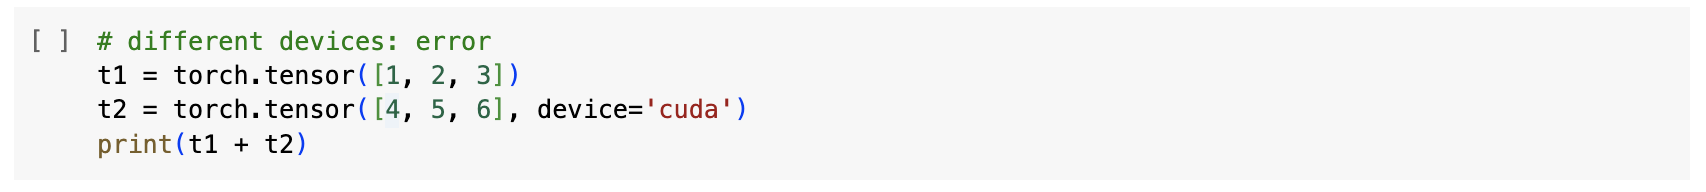

### Matrix Product
While multiplication `*` is used for element-wise multiplication, you need to use `torch.matmul` for matrix product. It also supports vector-vector product, matrix-vector product, and their batched versions.

The behavior of ```torch.matmul``` depends on the dimensionality of the tensors as follows:

- If both tensors are 1-dimensional, the dot product (scalar) is returned.

- If both arguments are 2-dimensional, the matrix-matrix product is returned.

- If the first argument is 1-dimensional and the second argument is 2-dimensional, a 1 is prepended to its dimension for the purpose of the matrix multiply. After the matrix multiply, the prepended dimension is removed.

- If the first argument is 2-dimensional and the second argument is 1-dimensional, the matrix-vector product is returned.

- If both arguments are at least 1-dimensional and at least one argument is N-dimensional (where N > 2), then a batched matrix multiply is returned. If the first argument is 1-dimensional, a 1 is prepended to its dimension for the purpose of the batched matrix multiply and removed after. If the second argument is 1-dimensional, a 1 is appended to its dimension for the purpose of the batched matrix multiple and removed after. The non-matrix (i.e. batch) dimensions are broadcasted (and thus must be broadcastable). For example, if input is a (j×1×n×n)(j×1×n×n) tensor and other is a (k×n×n)(k×n×n) tensor, out will be a (j×k×n×n)(j×k×n×n) tensor.


In [34]:
print('matrix x matrix: [2, 3] x [3, 4]')
tensor1 = torch.randn(2, 3)
tensor2 = torch.randn(3, 4)
print(torch.matmul(tensor1, tensor2).size())
print()

print('vector x vector: [3] x [3]')
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
print(torch.matmul(tensor1, tensor2).size())
print()

print('matrix x vector: [3, 4] x [4]')
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print(torch.matmul(tensor1, tensor2).size())
print()

print('batched matrix x batched matrix: [10, 3, 4] x [10, 4, 5]')
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
print(torch.matmul(tensor1, tensor2).size())
print()

matrix x matrix: [2, 3] x [3, 4]
torch.Size([2, 4])

vector x vector: [3] x [3]
torch.Size([])

matrix x vector: [3, 4] x [4]
torch.Size([3])

batched matrix x batched matrix: [10, 3, 4] x [10, 4, 5]
torch.Size([10, 3, 5])



In [35]:
# matrix-matrix, matrix-vector, vector-vector product using @ notation

print('matrix x matrix: [2, 3] x [3, 4]')
tensor1 = torch.randn(2, 3)
tensor2 = torch.randn(3, 4)
print((tensor1 @ tensor2).size())
print()

print('vector x vector: [3] x [3]')
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
print((tensor1 @ tensor2).size())
print()

print('matrix x vector: [3, 4] x [4]')
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
print((tensor1 @ tensor2).size())
print()

print('batched matrix x batched matrix: [10, 3, 4] x [10, 4, 5]')
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
print((tensor1 @ tensor2).size())
print()

matrix x matrix: [2, 3] x [3, 4]
torch.Size([2, 4])

vector x vector: [3] x [3]
torch.Size([])

matrix x vector: [3, 4] x [4]
torch.Size([3])

batched matrix x batched matrix: [10, 3, 4] x [10, 4, 5]
torch.Size([10, 3, 5])



##### Batched matrix-vector product

In deep learning, we often use batched matrix-vector product, where we compute product between batched vectors and matrix, instead of performing multiple matrix-vector product.

In [36]:
import time
X = torch.rand(10000, 256)
A = torch.rand(512, 256)

In [37]:
start = time.time()
products = []
for i in range(X.shape[0]):
    products.append(A @ X[i])
looped_output = torch.stack(products, dim=0)
print(looped_output.shape)
print(time.time() - start)

torch.Size([10000, 512])
0.4604010581970215


In [38]:
start = time.time()
batched_output = X @ A.T  # A.T returns the transpose of A
print(batched_output.shape)
print(time.time() - start)

torch.Size([10000, 512])
0.012033939361572266


##### Exercise: Implementing Rotation Matrix

a rotation matrix is a transformation matrix that is used to perform a rotation in Euclidean space.

\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}





In [51]:
# TODO: define rotation matrix as described above
# HINT: use math.cos, math.sin
import math
theta = 0.5 * math.pi

# TODO
R = torch.FloatTensor(np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]))

x = torch.tensor([1.0, 0.0])
print(R @ x)

tensor([6.1232e-17, 1.0000e+00])


(-1.0, 1.0, -1.0, 1.0)

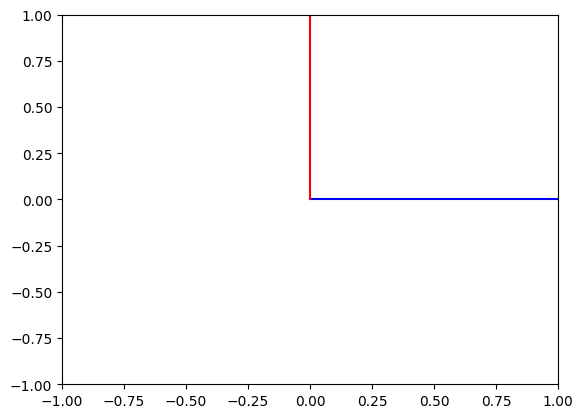

In [52]:
import matplotlib.pyplot as plt

plt.plot([0, x[0]], [0, x[1]], color='b')  # original tensor
plt.plot([0, (R @ x)[0]], [0, (R @ x)[1]], color='r')  # rotated tensor
plt.axis([-1, 1, -1, 1])

### Mean and Sum

Mean and sum are frequently used reduction operations. Without any additional argument, `mean` (or `sum`) returns the mean (or summation) value of the input tensor.

In [53]:
torch.manual_seed(0)
x = torch.rand(3, 2, 2)
print(x)
print(torch.mean(x))
print(x.mean())  # equivalent, but shorter

tensor([[[0.4963, 0.7682],
         [0.0885, 0.1320]],

        [[0.3074, 0.6341],
         [0.4901, 0.8964]],

        [[0.4556, 0.6323],
         [0.3489, 0.4017]]])
tensor(0.4710)
tensor(0.4710)


You can specify a dimension or a list of dimensions to reduce. You can also choose to keep the reduced dimension by setting `keepdim=True`.

In [54]:
print(x.mean(dim=2))  # reduce along the 3rd dim
print(x.mean(dim=2, keepdim=True))  # keep the 3rd dim
print(x.mean(dim=[1, 2]))  # reduce along dimension 1 & 2

tensor([[0.6322, 0.1103],
        [0.4708, 0.6933],
        [0.5440, 0.3753]])
tensor([[[0.6322],
         [0.1103]],

        [[0.4708],
         [0.6933]],

        [[0.5440],
         [0.3753]]])
tensor([0.3712, 0.5820, 0.4596])


### Exercise: Normalization

We have a 4x3 matrix. Create two tensors according to the following description.
1. Normalize the matrix such that the whole matrix to have zero mean and unit variance.
2. Normalize each row to have zero mean and unit variance.

In other words, you need to perform this computation
$$
\frac{X - \mathbb E[X]}{\mathrm{std}(X)}
$$
for the whole matrix and for each row.
Do not use any loop.

> Hint: you may use `Tensor.mean()` and `Tensor.std()` to compute mean and standard deviation.

In [55]:
t = torch.tensor(
    [[3., 0.5, -1.],
     [-5., 10., 3.],
     [34., 40., 35.],
     [-89., 23., 0.4]])

In [60]:
# TODO
# 1. Normalize the matrix such that the whole matrix to have zero mean and unit variance.
t1 = (t - t.mean()) / t.std()

print(t1)

tensor([[-0.0445, -0.1192, -0.1640],
        [-0.2835,  0.1645, -0.0445],
        [ 0.8813,  1.0604,  0.9111],
        [-2.7921,  0.5527, -0.1222]])


In [74]:
# TODO
# 2. Normalize the matrix such that the whole matrix to have zero mean and unit variance.
t2 = (t - t.mean(dim=1, keepdim=True)) / t.std(dim=1, keepdim=True)

print(t2)

tensor([[ 1.0722, -0.1650, -0.9073],
        [-1.0215,  0.9771,  0.0444],
        [-0.7259,  1.1406, -0.4148],
        [-1.1335,  0.7575,  0.3760]])


Once done correctly, you should get:
```
1.
tensor([[-0.0445, -0.1192, -0.1640],
        [-0.2835,  0.1645, -0.0445],
        [ 0.8813,  1.0604,  0.9111],
        [-2.7921,  0.5527, -0.1222]])

2.
tensor([[ 1.0722, -0.1650, -0.9073],
        [-1.0215,  0.9771,  0.0444],
        [-0.7259,  1.1406, -0.4148],
        [-1.1335,  0.7575,  0.3760]])
```
In fact, the first one corresponds to the batch normalization, while the second one corresponds to the instance normalization.

### Min and Max

`min` and `max` work in a similar way to the `mean`. However, if `dim` is specified, they return both the tensor of minimum (or maximum) values and the corresponding indices.

In [75]:
torch.manual_seed(0)
x = torch.rand(5, 3)
print(x)
print(x.min())

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939]])
tensor(0.0223)


In [76]:
values, indices = x.min(dim=1)
print(values)
print(indices)

tensor([0.0885, 0.1320, 0.4556, 0.3489, 0.0223])
tensor([2, 0, 2, 1, 0])


In [77]:
indices = x.argmin(dim=1)
print(indices)

tensor([2, 0, 2, 1, 0])


In [78]:
values, indices = x.max(dim=1)
print(values)
print(indices)

tensor([0.7682, 0.6341, 0.8964, 0.6323, 0.2939])
tensor([1, 2, 1, 0, 2])


### Exercise: computing classification accuracy

Let ```pred``` be a (100, 10) tensor containing some model's predicted scores / probabilities across 10 classes for 100 data samples.
Let ```y``` be (100, ) tensor containing the integer value between 0 and 9 which indicates the ground-truth label of 100 data samples.

Compute overall accuracy of the predictions

$$ \text{Accuracy} = \frac{\Sigma_i [\arg\max (pred[i]) == y[i]]}{\text{len(y)}} $$

In [92]:
torch.manual_seed(2)
logits = torch.rand(100, 10)
pred = torch.softmax(logits / 0.1, dim=-1)
y = torch.randint(0, 10, (100,))

print(pred[0])
print(y[0])

# TODO: compute accuracy
accuracy = ((pred.argmax(dim=1) == y)*1.0).mean()
print(f"Acc: {accuracy}")

tensor([0.1332, 0.0129, 0.1666, 0.0328, 0.3580, 0.1391, 0.0238, 0.0007, 0.1324,
        0.0005])
tensor(1)
Acc: 0.11999999731779099


### Concatenating and Stacking
You often need to combine multiple tensors. If you want to concatenate tensors in an existing dimension, use `torch.cat`. If you want to stack tensors by creating a new dimension, use `torch.stack`.

In [93]:
t1 = torch.zeros(3, 5)
t2 = torch.ones(4, 5)
t3 = torch.ones(3, 5)

# Concatenate multiple tensors in the given dimension
print('Concatenating 3x5 and 4x5 tensors in dimension 0:')
t = torch.cat([t1, t2], dim=0)
print(t)
print('Shape: {}'.format(t.shape))
print()

print('Stacking two 3x5 tensors in dimension 1:')
t = torch.stack([t1, t3], dim=1)
print(t)
print('Shape: {}'.format(t.shape))

Concatenating 3x5 and 4x5 tensors in dimension 0:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
Shape: torch.Size([7, 5])

Stacking two 3x5 tensors in dimension 1:
tensor([[[0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]]])
Shape: torch.Size([3, 2, 5])


### Exercise: Manipulating Tensors

You are given two tensors of shape [100, 32, 8, 8] and [100, 16, 4, 4].
1. Reshape (or view) each tensor to shape [100, 32x8x8] and [100, 16x4x4] respectively.
2. Concatenate the two reshaped tensors in dimension 1 (the second dimension).
3. Print the shape of the concatenated tensor.

In [41]:
t1 = torch.rand(100, 32, 8, 8)
t2 = torch.rand(100, 16, 4, 4)

# TODO
t1 = t1.reshape(100,-1) ; t2 = t2.reshape(100, -1)
t3 = torch.cat([t1, t2], dim=1)
t3.shape

torch.Size([100, 2304])

### In-Place Operations

The operations we learned so far create a new tensor as a result, leaving the input tensors intact. On the other hand, inplace operations mutate existing tensors. In PyTorch, any operation that mutates a tensor in-place is post-fixed with an `_`, e.g., `add_`.

In [ ]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])

print('t1.add(t2): ', end='')
print(t1.add(t2))
print('t1: ', end='')
print(t1)
print()

print('t1.add_(t2): ', end='')
print(t1.add_(t2)) # +=의 역할을 하게 된다.
print('t1: ', end='')
print(t1)

### Numpy Bridge
> WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common.

Though, it is easy with PyTorch to tranform Tensors to Numpy arrays and vice versa.

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function. Note that `torch.tensor()` always copies the given data while `torch.from_numpy()` avoids a copy.

In [42]:
# np.float32 -> torch.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

ones_tensor = torch.from_numpy(ones_matrix)
print("PyTorch Tensor:")
print(ones_tensor)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])


To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [43]:
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("Numpy Matrix:")
print(numpy_matrix)

Numpy Matrix:
[[1. 1.]
 [1. 1.]]


## Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**, which makes backpropagation easy.

This means that the **backpropagation** depends on how the code is written and executed.


When the `requires_grad` attribute is set to `True`, it starts tracking all operations performed on that tensor.

In [44]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = torch.ones(2, 2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


You can set the value of `requires_grad` when creating a tensor, or later by using `x.requires_grad_()` method.



In [45]:
ones_tensor.requires_grad_(False)
print(ones_tensor.requires_grad)

False


### Computing Gradients
If you call `.backward()`, then all the gradients are computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.

To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

NOTE: ```.backward()``` can only be called on scalar tensor

In [46]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = torch.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

# y was created as a result of an operation, so it has a grad_fn
print(y)

tensor([7.], grad_fn=<AddBackward0>)


In [47]:
print(x.grad)

None


Let's backprop!

In [48]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [49]:
x.grad

tensor([2.])

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

In [50]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = torch.ones(1, requires_grad=True)

# Transformation constants
a = 5
b = 10

# Define the tranformation and store the result
# in a new variable
y = a * x + b

y.backward()
x.grad

tensor([5.])

# Exercise

## Linear Regression using Gradient Descent

As a toy example, we are going to perform linear regression with gradient descent.
Let's say we are given the following dataset, which is generated from a linear model $y = 2x + 1 + \epsilon, \epsilon \sim \mathcal N(0, \sigma^2)$.

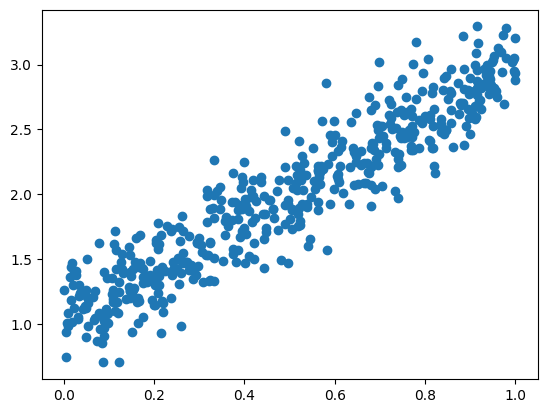

In [51]:
# Synthetic data
torch.manual_seed(0)
x = torch.rand(500)
y = 2 * x + 1 + 0.2 * torch.randn(500)

import matplotlib.pyplot as plt

plt.scatter(x, y);

We are going to recover the underlying model by minimizing the **mean** of L2 loss with gradient descent:
$$
\frac{1}{2}(y - \hat y)^2
$$
where $\hat y = ax + b$. $a$ and $b$ are our parameters.


Gradient Descent:

![gradient descent](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2PSTfqZftyiZzlb7GeHUXJ5bRZFEzDma6Bw&s)

In [75]:
# Our parameters initialized to 0
a = torch.zeros([], requires_grad=True)
b = torch.zeros([], requires_grad=True)

In [64]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [76]:
# Learning rate
lr = 0.1

for i in range(1000):
    # Reset gradient
    a.grad = None
    b.grad = None

    # TODO: Compute loss and its gradients w.r.t. a and b
    # HINT: .backward() can only be called on scalar tensors, so make sure to use mean of loss
    mse = ((y - (a*x + b) )**2).mean()
    mse.backward()

    # Update value
    a.data -= lr * a.grad # gradient descent
    b.data -= lr * b.grad

print(a, b) # a=2, b=1

tensor(1.9548, requires_grad=True) tensor(1.0249, requires_grad=True)


## Linear Regression using Real Data

In this exercise, the goal is to predict the quality of red wine based on its acidity, residual sugar, density, pH, alcohol, and other features

In [80]:
import os
import zipfile
import urllib.request
import pandas as pd

# 다운로드 URL & 파일명
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_path = "wine_quality.zip"
csv_filename = "winequality-red.csv"

# 파일이 없으면 다운로드
if not os.path.exists(zip_path):
    print("📥 데이터 다운로드 중...")
    urllib.request.urlretrieve(url, zip_path)
    print("✅ 다운로드 완료!")

# 압축 해제
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall()

# CSV 파일 로드
df = pd.read_csv(csv_filename, sep=";")
print("✅ 데이터 로드 완료!")
print(df.head(10))  # 상위 10개 출력

📥 데이터 다운로드 중...
✅ 다운로드 완료!
✅ 데이터 로드 완료!
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0     

In [81]:
Xy = torch.from_numpy(np.array(df)).float()
X = Xy[:, :-1]
y = Xy[:, -1:]

print(X.shape)
print(y.shape)

print(y.min())
print(y.max())

torch.Size([1599, 11])
torch.Size([1599, 1])
tensor(3.)
tensor(8.)


minimize the L2 loss with gradient descent:
$$
\frac{1}{2}(y - \hat y)^2
$$
where $\hat y = XA + b$. $A$ and $b$ are our parameters.

In [127]:
# TODO

# TODO: initialize our parameters initialized to 0
# Hint: consider the shape of X and y when initializing matrix A and scalar b
A = torch.zeros((11), requires_grad=True)
b = torch.zeros((), requires_grad=True)

# Learning rate
lr = 0.00000000055

for i in range(1000):
    # TODO
    mse = ((y - (X@A + b))**2).mean()
    mse.backward()

    # Update value
    A.data -= lr * A.grad # gradient descent
    b.data -= lr * b.grad

    if i % 100 == 0:
        print(f"Step {i}, loss: {mse.item()}")

Step 0, loss: 32.4165153503418
Step 100, loss: 31.508010864257812
Step 200, loss: 28.94384002685547
Step 300, loss: 25.129024505615234
Step 400, loss: 20.66554832458496
Step 500, loss: 16.256454467773438
Step 600, loss: 12.59388542175293
Step 700, loss: 10.248821258544922
Step 800, loss: 9.580187797546387
Step 900, loss: 10.677716255187988


In [128]:
print(A)
print(b)

tensor([0.0205, 0.0013, 0.0007, 0.0061, 0.0002, 0.0359, 0.1006, 0.0024, 0.0081,
        0.0016, 0.0256], requires_grad=True)
tensor(0.0025, requires_grad=True)


In [129]:
for i in range(len(df.columns[:-1])):
    print(f"Feature: {df.columns[i]}, weight: {A[i].item()}")

Feature: fixed acidity, weight: 0.020482776686549187
Feature: volatile acidity, weight: 0.001289593754336238
Feature: citric acid, weight: 0.0006618504994548857
Feature: residual sugar, weight: 0.006104643456637859
Feature: chlorides, weight: 0.00021365965949371457
Feature: free sulfur dioxide, weight: 0.03585454449057579
Feature: total sulfur dioxide, weight: 0.10060232132673264
Feature: density, weight: 0.002444385550916195
Feature: pH, weight: 0.008123950101435184
Feature: sulphates, weight: 0.0016107659321278334
Feature: alcohol, weight: 0.02564471773803234


In [136]:
# Using normalized features
# In linear regression, it is common to normalize (or standardize) features

# TODO
# 1. Normalize each row of X to have zero mean and unit variance (save to new tensor named X_normalized)
X_normalized = (X - X.mean(dim=0)) / X.std(dim=0)

# 2. perform linear regression as above, using X_normalized instead of X

# TODO: initialize our parameters initialized to 0
# Hint: consider the shape of X and y when initializing matrix A and scalar b
A = torch.zeros((11), requires_grad=True)
b = torch.zeros((), requires_grad=True)

# Learning rate
lr = 0.0000015

for i in range(1000):
    # TODO
    mse = ((y - (X_normalized@A + b))**2).mean()
    mse.backward()

    # Update value
    A.data -= lr * A.grad # gradient descent
    b.data -= lr * b.grad

    if i % 100 == 0:
        print(f"Step {i}, loss: {mse.item()}")

Step 0, loss: 32.4165153503418
Step 100, loss: 31.463720321655273
Step 200, loss: 28.73722267150879
Step 300, loss: 24.560941696166992
Step 400, loss: 19.431041717529297
Step 500, loss: 13.956974983215332
Step 600, loss: 8.789093017578125
Step 700, loss: 4.541353225708008
Step 800, loss: 1.7184158563613892
Step 900, loss: 0.6556629538536072


In [137]:
print(A)
print(b)

tensor([-4.1625e-05, -3.8764e-06, -2.0731e-05, -2.2487e-05, -1.1466e-05,
         1.5615e-06, -3.9122e-06,  2.1245e-04,  1.1600e-05, -5.7049e-06,
         3.1987e-05], requires_grad=True)
tensor(6.5457, requires_grad=True)


In [138]:
for i in range(len(df.columns[:-1])):
    print(f"Feature: {df.columns[i]}, weight: {A[i].item()}")

Feature: fixed acidity, weight: -4.1624971345299855e-05
Feature: volatile acidity, weight: -3.876369646604871e-06
Feature: citric acid, weight: -2.073099312838167e-05
Feature: residual sugar, weight: -2.2487105525215156e-05
Feature: chlorides, weight: -1.1465665011201054e-05
Feature: free sulfur dioxide, weight: 1.5615481743225246e-06
Feature: total sulfur dioxide, weight: -3.912173269782215e-06
Feature: density, weight: 0.00021245013340376318
Feature: pH, weight: 1.160040483227931e-05
Feature: sulphates, weight: -5.704887371393852e-06
Feature: alcohol, weight: 3.19871396641247e-05


# Handling Data

PyTorch provides an elegant way to handle data. You can easily create new datasets by extending `Dataset` class, but in this tutorial, we will use existing datasets nicely packaged in `torchvision`. `torchvision` offers several other utilities along with popular vision datasets.

In [139]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import RandomSampler

import torchvision
import torchvision.transforms as transforms

## Dataset
As an example, we are going to load MNIST digit classification dataset. MNIST consists of 28x28 grayscale images of digits 0-9.
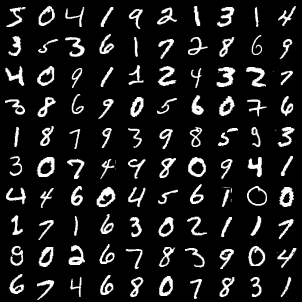

In [140]:
train_set = torchvision.datasets.MNIST(
    root='D:/data', train=True, transform=transforms.ToTensor(), download=True)
test_set = torchvision.datasets.MNIST(
    root='D:/data', train=False, transform=transforms.ToTensor(), download=True)

isinstance(train_set, Dataset)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 4692762.90it/s]


Extracting D:/data\MNIST\raw\train-images-idx3-ubyte.gz to D:/data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 140021.68it/s]


Extracting D:/data\MNIST\raw\train-labels-idx1-ubyte.gz to D:/data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:02<00:00, 777160.49it/s]


Extracting D:/data\MNIST\raw\t10k-images-idx3-ubyte.gz to D:/data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2270623.21it/s]

Extracting D:/data\MNIST\raw\t10k-labels-idx1-ubyte.gz to D:/data\MNIST\raw



True

In [141]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [142]:
isinstance(train_set, Dataset)

True

Let's check the first element of the `train_set`.

In [143]:
train_set[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

It is an image-label pair! You can visualize the image by converting it to PIL (Python image library) image.

In [144]:
transforms.functional.to_pil_image(train_set[0][0])

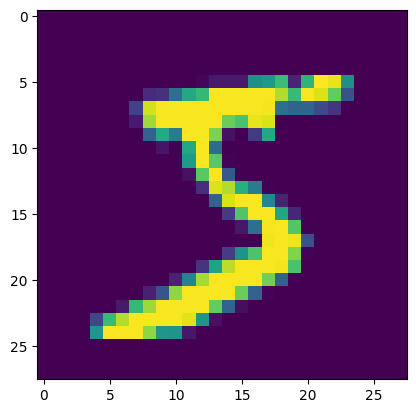

In [147]:
plt.imshow(train_set[0][0].reshape(28,28,1))

The shape of image:

In [148]:
print(train_set[0][0].shape)

torch.Size([1, 28, 28])


Here are 100 image samples:

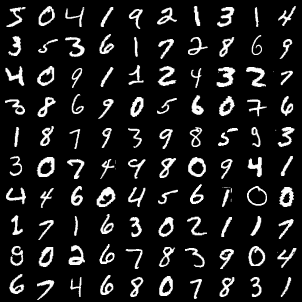

In [149]:
transforms.functional.to_pil_image(torchvision.utils.make_grid(train_set.data[:100].unsqueeze(1), nrow=10))

## Transforms

You often want to tranfrom data to fit into your model. Or, you may want to augment data with some random tranformations. In PyTorch, you can do these by specifying `transform` while instantiating a dataset.

In the previous example, we simply used `ToTensor`, which convert the data into PyTorch tensors. You can do much more by composing multiple transformations by `Compose`.

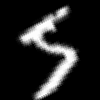

In [151]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((100, 100)),  # Resize to 100x100 image
     transforms.RandomRotation(30)  # Random rotation between degree [-30, 30]
     ])

train_set_augmented = torchvision.datasets.MNIST(
    root='D:/data', train=True, transform=transform, download=True)

transforms.functional.to_pil_image(train_set_augmented[0][0])

## Data Loader
During training, you need to randomly sample a mini-batch from the training set. `DataLoader` and various samplers will do the job.

In [152]:
# This sampler will run for 1 epoch and terminate
sampler = RandomSampler(train_set)

# This sampler will run for 10k training steps if the batch size is 100
sampler = RandomSampler(train_set,
                        replacement=True,
                        num_samples=100 * 10000)

# Use the sampler to create a data loader
train_loader = DataLoader(
    train_set, batch_size=100, sampler=sampler, num_workers=4)

# Test loader runs for 1 epoch
test_loader = DataLoader(
    test_set, batch_size=200, num_workers=4)

## Iterating through the Data Loader

Now we have data loader, so we can iterate through the dataset.

In [153]:
for x, y in train_loader:
    # x, y are the mini-batches of images and labels.
    # For now, let's just print the shape of x and y and exit.
    print(x.shape)
    print(y.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


`next` and `iter` is also frequently used to iterate through the dataset.

In [154]:
x, y = next(iter(train_loader))
print(x.shape)
print(y.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])
